# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
data = pd.read_csv(r'iris_dataset-1.csv') 

# Data Preprocessing

In [3]:
# check for null values
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(3)

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# Pairplot for visualization

In [10]:
import seaborn as sns

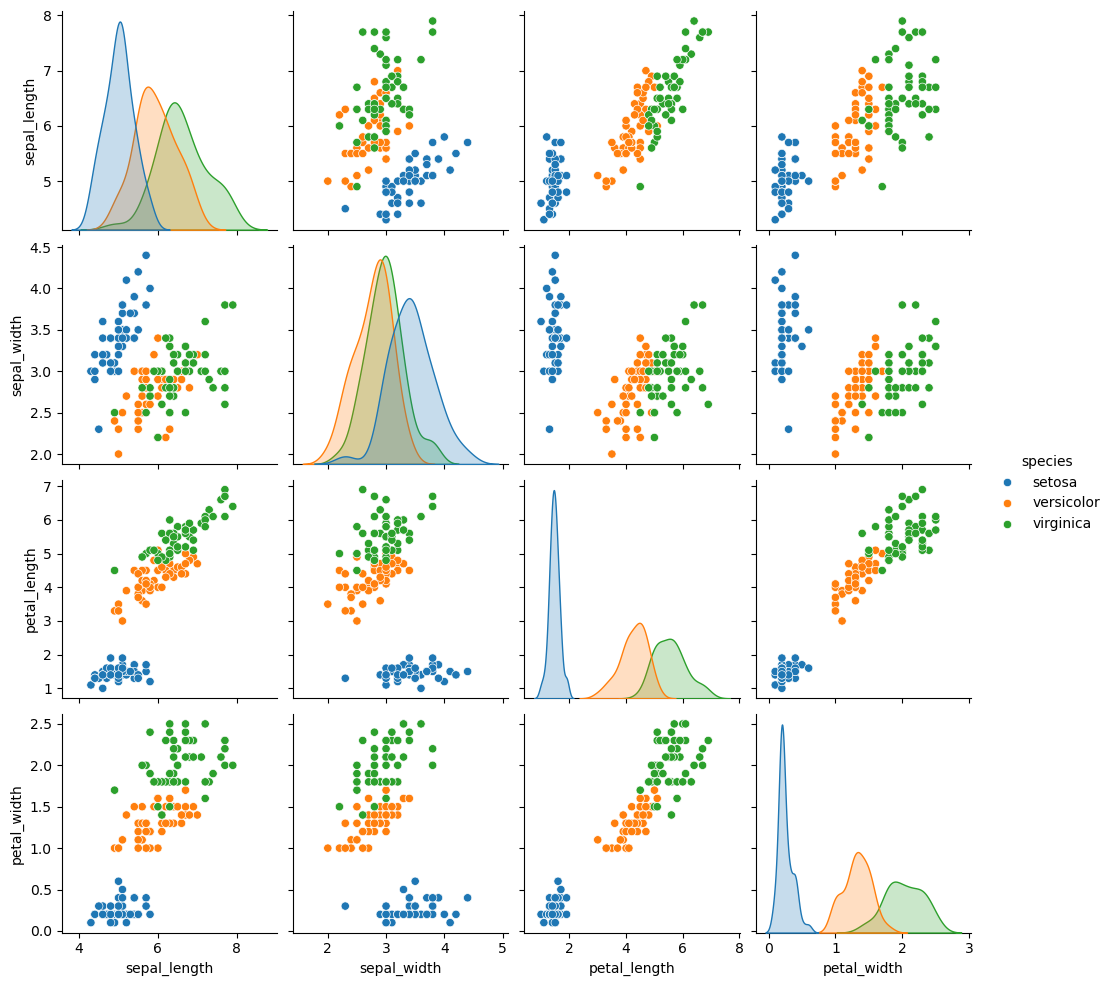

In [11]:
sns.pairplot(data,hue = 'species')

<Axes: xlabel='species', ylabel='count'>

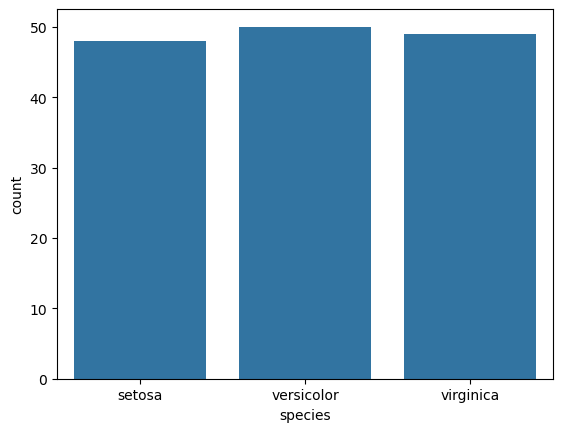

In [12]:
sns.countplot(data=data, x='species')

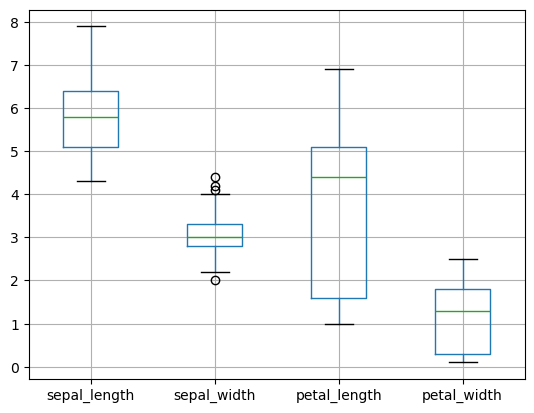

In [13]:
data.boxplot()
plt.show()

In [14]:
def outlier_removal(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    
    return data[(data >= q1 - 1.5*IQR) & (data <= q3 + 1.5*IQR)]

In [15]:
data1 = data.copy() 

In [16]:
data1['sepal_length'] = outlier_removal(data1['sepal_length'])


In [17]:
data1.shape

(147, 5)

In [18]:
data.shape


(147, 5)

In [19]:
data1['sepal_width'] = outlier_removal(data1['sepal_width'])

In [20]:
data1['sepal_width'].shape



(147,)

In [21]:
data1['petal_length'] = outlier_removal(data1['petal_length'])

In [22]:
data1['petal_width'] = outlier_removal(data1['petal_width'])

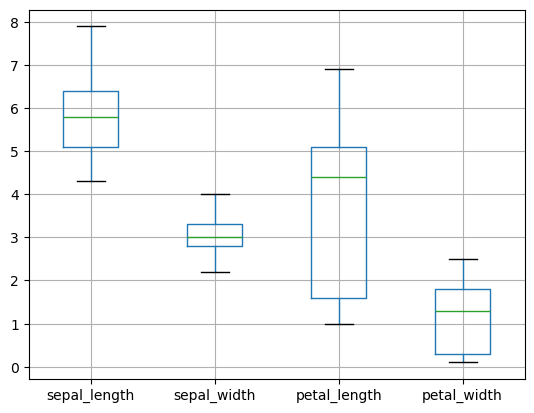

In [23]:
data1.boxplot()
plt.show()

In [24]:
data1.shape

(147, 5)

In [25]:
data1.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
data1.duplicated().sum()

np.int64(0)

In [27]:
data1 = data1.dropna(subset = ['sepal_width'])

In [28]:
data1.shape

(143, 5)

# Select features and target variable

In [29]:
X = data1.drop(columns=['species'],axis=1) # Independent variable
y = data1['species'] # Dependent variable

# Split the data into test and training set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# size of data

In [33]:
X_train.shape, y_train.shape

((114, 4), (114,))

In [34]:
X_test.shape, y_test.shape

((29, 4), (29,))

# Decision Tree 

# 1. Decision Tree (Ginni)

In [35]:
from sklearn.tree import DecisionTreeClassifier # Classification

In [36]:
clf_dt = DecisionTreeClassifier(criterion='gini')

# train the model


In [53]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

# visualize the tree

In [55]:
from sklearn import tree

In [56]:
data1.species.value_counts()

species
versicolor    49
virginica     49
setosa        45
Name: count, dtype: int64

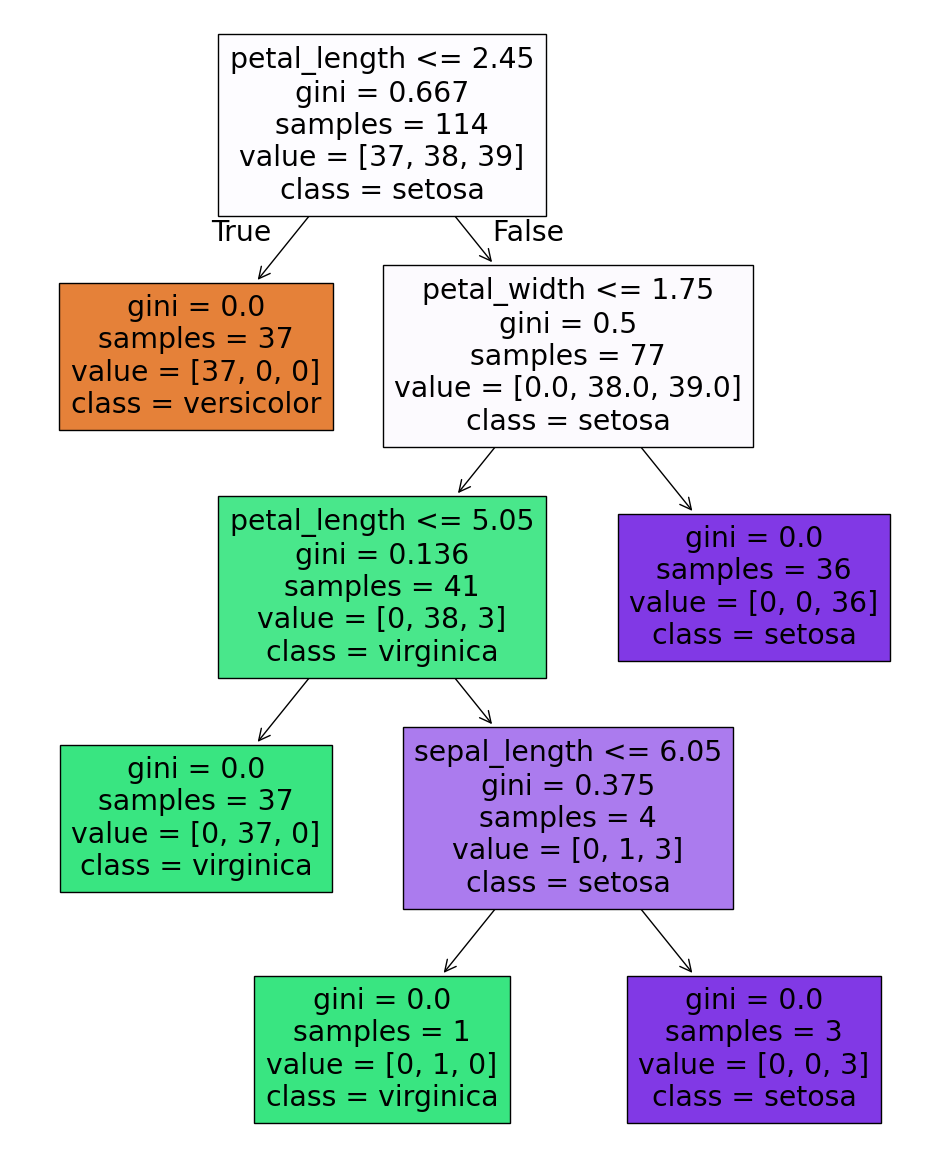

In [57]:
plt.figure(figsize=(12,15))

tree.plot_tree(clf_dt,
              feature_names = X.columns,
              class_names = ['versicolor','virginica','setosa'],
              filled = True)

plt.show()

# Prediction

In [58]:
y_pred = clf_dt.predict(X_test)

# Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [63]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average = 'macro')
recall = recall_score(y_test,y_pred, average = 'macro')
f1 = f1_score(y_test,y_pred, average = 'macro')
conf_matrix = confusion_matrix(y_test,y_pred)

In [65]:
print(f"Accuraacy Decision Tree is {accuracy}")

Accuraacy Decision Tree is 0.896551724137931


In [66]:
print(f'Precision is {precision}')

Precision is 0.9074074074074074


In [67]:
print(f'Recall is {recall}')

Recall is 0.903030303030303


In [68]:
print(f'F1 score is {f1}')

F1 score is 0.9038901601830663


In [73]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


In [74]:
print('Classification Report')
clf_report=classification_report(y_test,y_pred)
print(clf_report)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.83      0.91      0.87        11
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



# 2. Decision Tree (Entropy)

In [76]:
clf_dt_2 = DecisionTreeClassifier(criterion='entropy')

# train the model

In [77]:
clf_dt_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# visualize the tree

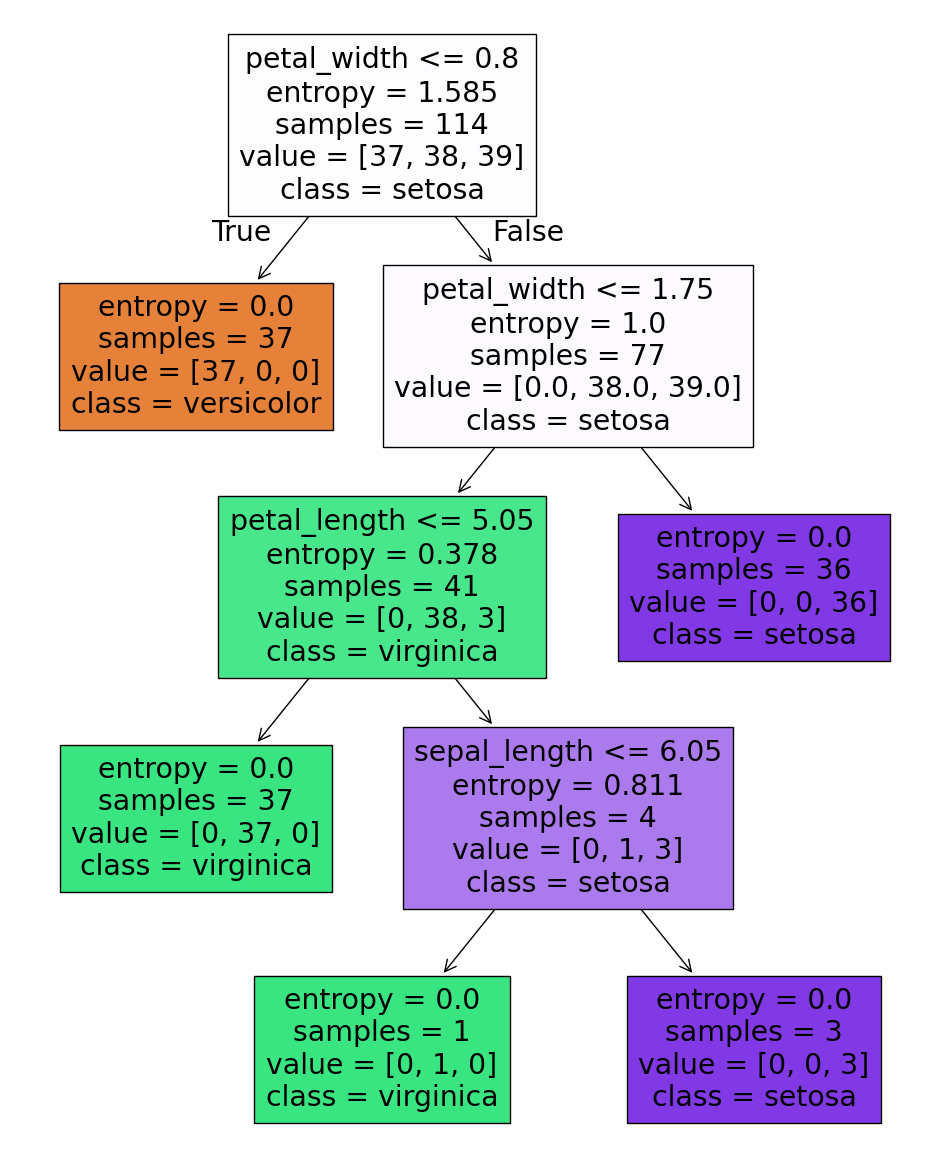

In [78]:
plt.figure(figsize=(12,15))

tree.plot_tree(clf_dt_2,
              feature_names = X.columns,
              class_names = ['versicolor','virginica','setosa'],
              filled = True)

plt.show()

# Prediction

In [86]:
y_pred_2= clf_dt_2.predict(X_test)

# Model Evaluation

In [87]:
accuracy = accuracy_score(y_test,y_pred_2)
precision = precision_score(y_test,y_pred_2, average = 'macro')
recall = recall_score(y_test,y_pred_2, average = 'macro')
f1 = f1_score(y_test,y_pred_2, average = 'macro')
conf_matrix = confusion_matrix(y_test,y_pred_2)

In [88]:
print(f"Accuraacy Decision Tree is {accuracy}")

Accuraacy Decision Tree is 0.896551724137931


In [89]:
print(f'Precision is {precision}')

Precision is 0.9074074074074074


In [90]:
print(f'Recall is {recall}')

Recall is 0.903030303030303


In [91]:
print(f'F1 score is {f1}')

F1 score is 0.9038901601830663


In [92]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


In [93]:
print('Classification Report')
clf_report=classification_report(y_test,y_pred_2)
print(clf_report)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.83      0.91      0.87        11
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



# Random Forest -Bagging / Bootstrap aggregation

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
model_rf = RandomForestClassifier(n_estimators=350,criterion='gini', oob_score=True)
# oob score is for validation data

In [97]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, oob_score=True)

# Predict

In [98]:
y_pred_3 = model_rf.predict(X_test)

# Model Evaluation

In [101]:
acc_score = accuracy_score(y_test,y_pred_3)
print(f'Accuracy:{acc_score :.2f}')

Accuracy:0.90


In [102]:
# the model validation score
model_rf.oob_score_

0.9649122807017544

In [103]:
print('Confusion Matrix:')
conf_mtx=confusion_matrix(y_test,y_pred_3)
print(conf_mtx)

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


In [105]:
print('Classification Report')
class_rpt= classification_report(y_test,y_pred_3)
print(class_rpt)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.83      0.91      0.87        11
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



# Boosting - Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
model_gb = GradientBoostingClassifier(n_estimators=110,verbose=2)

In [108]:
# Train the model
model_gb.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9155            2.76s
         2           0.7715            1.61s
         3           0.6551            1.20s
         4           0.5597            1.05s
         5           0.4813            0.95s
         6           0.4155            0.84s
         7           0.3593            0.75s
         8           0.3119            0.68s
         9           0.2715            0.63s
        10           0.2370            0.59s
        11           0.2067            0.55s
        12           0.1805            0.53s
        13           0.1579            0.52s
        14           0.1384            0.49s
        15           0.1215            0.49s
        16           0.1067            0.49s
        17           0.0940            0.48s
        18           0.0826            0.47s
        19           0.0728            0.47s
        20           0.0642            0.46s
        21           0.0564            0.44s
        2

GradientBoostingClassifier(n_estimators=110, verbose=2)

# Prediction

In [109]:
y_pred_4 = model_gb.predict(X_test)

# Model Evaluation

In [110]:
acc_score = accuracy_score(y_test,y_pred_4)
print(f'Accuracy:{acc_score :.2f}')

Accuracy:0.90


In [111]:
print('Confusion Matrix:')
conf_mtx=confusion_matrix(y_test,y_pred_4)
print(conf_mtx)

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


In [113]:
print('Classification Report')
class_rpt= classification_report(y_test,y_pred_4)
print(class_rpt)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.83      0.91      0.87        11
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



# Feature Importance

In [118]:
print('Gradient Boostong feature importance:')
pd.Series(model_gb.feature_importances_, index= X.columns )

Gradient Boostong feature importance:


sepal_length    0.019440
sepal_width     0.078774
petal_length    0.296490
petal_width     0.605296
dtype: float64

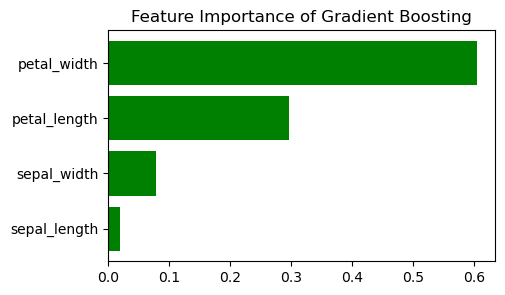

In [119]:
plt.figure(figsize=(5,3))

plt.barh(X.columns,model_gb.feature_importances_, color='green')
plt.title('Feature Importance of Gradient Boosting')
plt.show()

In [120]:
data1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [121]:
print('Feature Importance of Decision Tree - Gini index')
pd.Series(clf_dt.feature_importances_, index= X.columns)

Feature Importance of Decision Tree - Gini index


sepal_length    0.019741
sepal_width     0.000000
petal_length    0.546836
petal_width     0.433423
dtype: float64

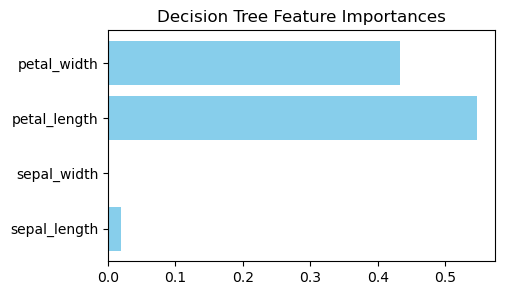

In [122]:
plt.figure(figsize=(5,3))
plt.barh(X.columns,clf_dt.feature_importances_, color='skyblue')
plt.title('Decision Tree Feature Importances')
plt.show()

In [123]:
print('Random forest feature importance')
pd.Series(model_rf.feature_importances_,index=X.columns)

Random forest feature importance


sepal_length    0.108603
sepal_width     0.020482
petal_length    0.462474
petal_width     0.408441
dtype: float64

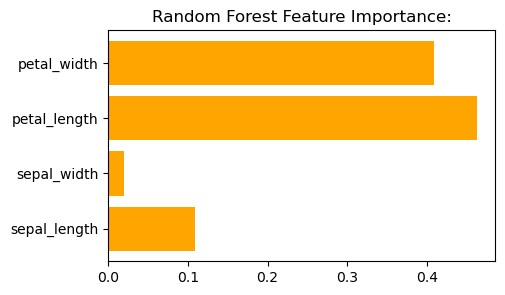

In [124]:
plt.figure(figsize=(5,3))
plt.barh(X.columns,model_rf.feature_importances_,color='orange')
plt.title('Random Forest Feature Importance:')
plt.show()